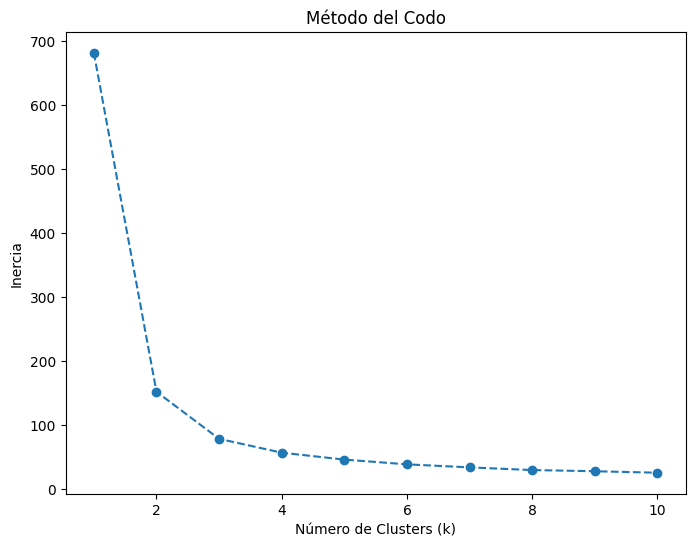

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(X, columns=feature_names)

# Encontrar el número óptimo de clusters utilizando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo para determinar el número óptimo de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [6]:
# Basado en el método del codo, elegimos un número óptimo de clusters (en este caso, 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

In [7]:
# Visualización interactiva con Plotly Express
fig = px.scatter_3d(df, x=feature_names[0], y=feature_names[1], z=feature_names[2],
                    color='cluster', symbol='cluster', size_max=10,
                    title='Clustering K-means (3 clusters) - Iris Dataset')
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.show()